In [7]:
import numpy as np
import os
from skimage import io
import sys
import h5py
import glob
from skimage import io
import matplotlib.pyplot as plt
import pickle
import cv2


In [8]:
folder =  '/media/DATA/jbonato/astro_segm/set5/train_single_or/'
folder_save = '/media/DATA/jbonato/astro_segm/set5/train_single/'

file_list = glob.glob(folder+'*')
file_list = [i for i in file_list if not('nf_enh' in i) and not('.hdf5' in i) ]
file_list.sort()

In [9]:
for file in file_list:
    
    print(file[:-4])
    
    image = io.imread(file)
    dset= h5py.File(file[:-4]+'.hdf5','r') 
    
    proc_mask =  np.asarray(dset['Values'])
    soma_mask =  np.asarray(dset['Values_soma'])
    
    im_out = cv2.resize(image[5:-5,5:-5], (73,73))
    
    im_out = np.pad(im_out,((4,3),(4,3)),'constant').astype(np.float32)
    name = os.path.basename(file)[:-4]
    io.imsave(folder_save+name+'.tiff',im_out)
    
    proc_mask = cv2.resize(proc_mask[5:-5,5:-5], (73,73))
    proc_mask = np.pad(proc_mask,((4,3),(4,3)),'constant').astype(np.float32)
    
    proc_mask[proc_mask<0.1]=0
    proc_mask[proc_mask>0]=1
    
    soma_mask = cv2.resize(soma_mask[5:-5,5:-5], (73,73))
    soma_mask = np.pad(soma_mask,((4,3),(4,3)),'constant').astype(np.float32)
    soma_mask[soma_mask<0.1]=0
    soma_mask[soma_mask>0]=1
    
    with h5py.File(folder_save+name+'.hdf5','w') as f:
        dset = f.create_dataset('Values',data=proc_mask)
        dset2 = f.create_dataset('Values_soma',data=soma_mask)

/media/DATA/jbonato/astro_segm/set5/train_single_or/SMALL_001_single_0
/media/DATA/jbonato/astro_segm/set5/train_single_or/SMALL_001_single_1
/media/DATA/jbonato/astro_segm/set5/train_single_or/SMALL_001_single_2
/media/DATA/jbonato/astro_segm/set5/train_single_or/SMALL_001_single_3
/media/DATA/jbonato/astro_segm/set5/train_single_or/SMALL_001_single_4
/media/DATA/jbonato/astro_segm/set5/train_single_or/SMALL_002_single_0
/media/DATA/jbonato/astro_segm/set5/train_single_or/SMALL_002_single_1
/media/DATA/jbonato/astro_segm/set5/train_single_or/SMALL_002_single_2
/media/DATA/jbonato/astro_segm/set5/train_single_or/SMALL_002_single_3
/media/DATA/jbonato/astro_segm/set5/train_single_or/SMALL_002_single_4
/media/DATA/jbonato/astro_segm/set5/train_single_or/SMALL_003_single_0
/media/DATA/jbonato/astro_segm/set5/train_single_or/SMALL_003_single_1
/media/DATA/jbonato/astro_segm/set5/train_single_or/SMALL_003_single_2
/media/DATA/jbonato/astro_segm/set5/train_single_or/SMALL_004_single_0
/media

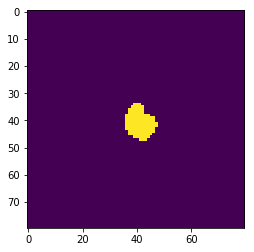

In [10]:
#image.shape
plt.imshow(soma_mask)

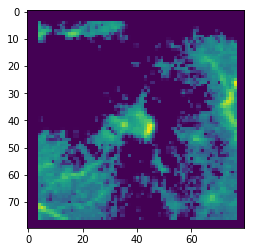

In [11]:
plt.imshow(im_out)